# Nick Wan Data Science Bootcamp Day #6

Notes and code from the sixth day of the Nick Wan data science bootcamp

## Import Data and Packages

(672545, 101)
(632, 11)


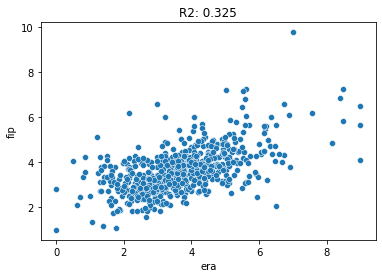

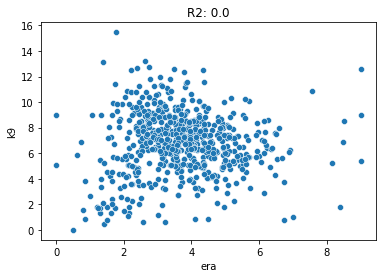

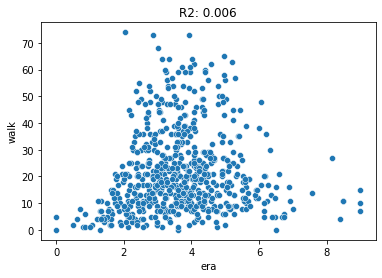

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./data/2023-nwbc-data.csv')
era_df = pd.read_csv('./data/era.csv')

print(df.shape)
print(era_df.shape)

cols = ['fip', 'k9', 'walk']

for c in cols:
    r2 = pearsonr(era_df['era'], era_df[c])[0]**2
    sns.scatterplot(data=era_df, x='era', y=c)
    plt.title(f"R2: {round(r2, 3)}")
    plt.show()

## Linear Regression

We can incorporate all the statistical information from Day 5 into a **linear regression** of the form

$$
y = mx + b
$$

* $m$ is the slope
* $x$ is your independent variable
* $b$ is the y-intercept
* $y$ is the predicted value

We can create a linear regression equation for our ERA dataset with the following equation:

$$
ERA = w \times FIP + b
$$

In this case, $w$ is some sort of weight that scales our FIP value. But how do we find this? WITH MACHINE LEARNING BABYYYYY.

In [2]:
from sklearn.linear_model import LinearRegression

# set our target variable - what we eventually want to predict
target = 'era'
features = ['fip']

# now create the model!
model = LinearRegression()
model.fit(era_df.loc[:, features], era_df[target])

LinearRegression()

Cool, we now have our linear regression model. Now our model can tell us what our weights should be inside the `coef_` PIV!

In [3]:
model.coef_

array([0.77745294])

OK cool, but what is our y-intercept?

In [4]:
model.intercept_

0.857680025417455

Gotcha, so now we know that our linear equation is:

$$
ERA = 0.777 \times FIP + 0.858
$$

Let's create a dataframe of weights for our model and a variable for our y-intercept:

In [5]:
ws = pd.DataFrame([model.coef_], columns=features)
ws

,fip
0,0.777453


In [6]:
b = model.intercept_
b

0.857680025417455

Now we can make predictions with these variables and create our y values in a new column!

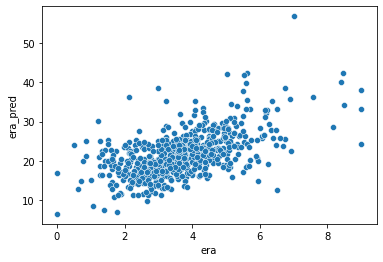

In [7]:
col = 'fip'

era_df[f'{target}_pred'] = era_df[col].values[0] * era_df[col] + b

sns.scatterplot(data=era_df, x=target, y=f'{target}_pred')
plt.show()

There's also *multi-linear regression* where you can use more than one $X$ variable, which is incredibly useful! The formula looks like:

$$
y = m_1x_1 + m_2x_2 + ... + m_nx_n + b
$$

Let's try to do this with our ERA dataset:

In [8]:
# set our target variable - what we eventually want to predict
target = 'era'
features = ['fip', 'k9']

# now create the model!
model = LinearRegression()
model.fit(era_df.loc[:, features], era_df[target])

ws = pd.DataFrame([model.coef_], columns=features)
b = model.intercept_

ws

,fip,k9
0,0.955593,0.174857


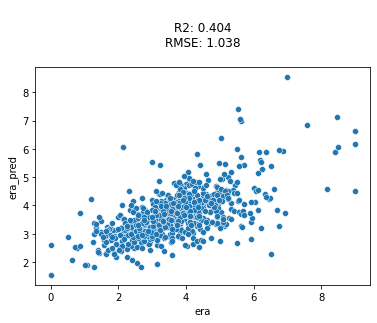

In [9]:
for col in features:
    era_df[f'{col}_w'] = ws[col].values[0] * era_df[col]

era_df[f'{target}_pred'] = era_df['fip_w'] + era_df['k9_w'] + b

r2 = pearsonr(era_df[target], era_df[f'{target}_pred'])[0]**2
rmse = mean_squared_error(era_df[target], era_df[f'{target}_pred'])**0.5
sns.scatterplot(data=era_df, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

We have been doing these predictions by hand, but there is a predict function that will create these predictions for us:

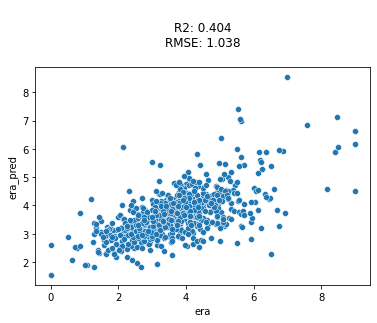

In [10]:
era_df[f'{target}_pred'] = model.predict(era_df.loc[:, features])
r2 = pearsonr(era_df[target], era_df[f'{target}_pred'])[0]**2
rmse = mean_squared_error(era_df[target], era_df[f'{target}_pred'])**0.5
sns.scatterplot(data=era_df, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

Same graph, just the prediction math is being done for us :)

Remember those train and test dataframes from before? Let's apply what we learned from machine learning stuff today!

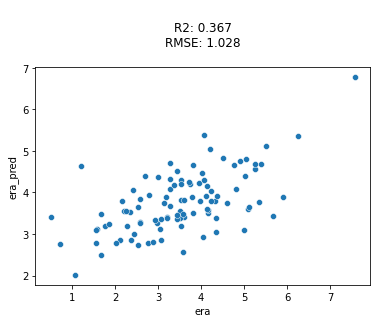

In [13]:
train = era_df.sample(100, random_state=1)
test = era_df.sample(100, random_state=2)

model = LinearRegression()
model.fit(train.loc[:, features], train[target])
test[f'{target}_pred'] = model.predict(test.loc[:, features])

r2 = pearsonr(test[target], test[f'{target}_pred'])[0]**2
rmse = mean_squared_error(test[target], test[f'{target}_pred'])**0.5
sns.scatterplot(data=test, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

Congratulations! You just did your first machine learning model!

## HOMEWORK

1. Let's use different train and test datasets. Using `random_state=10` for the train dataset and `random_state=20` for the test dataset, predict ERA in the test dataset using strikeouts per 9, walks, home runs, and FIP using `LinearRegression()`. Visualize your prediction by showing actual ERA on the X-axis and your predicted ERA on the Y-axis. Display R2 and RMSE in your graph.

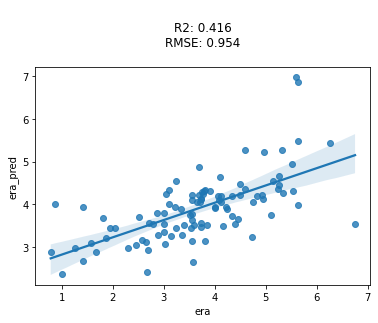

In [16]:
train = era_df.sample(100, random_state=10)
test = era_df.sample(100, random_state=20)

target = 'era'
features = ['k9', 'walk', 'home_run', 'fip']

model = LinearRegression()
model.fit(train.loc[:, features], train[target])
test[f'{target}_pred'] = model.predict(test.loc[:, features])

r2 = pearsonr(test[target], test[f'{target}_pred'])[0]**2
rmse = mean_squared_error(test[target], test[f'{target}_pred'])**0.5
sns.regplot(data=test, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

In [17]:
# write all updates to our datasets back out for use in Day 6
era_df.to_csv('./data/era.csv', index=False)
df.to_csv('./data/2023-nwbc-data.csv', index=False)